> Projeto Desenvolve <br>
Programação Intermediária com Python <br>
Profa. Camila Laranjeira (mila@projetodesenvolve.com.br) <br>

# 3.11 - Data Model

## Exercícios

#### Q1. `dataclass`
Exercício adaptado de [codechalleng.es/bites/154/](https://codechalleng.es/bites/154/) e [codechalleng.es/bites/320/](https://codechalleng.es/bites/320/).

Neste desafio, você deve escrever uma `dataclass` chamada `Bite` que gerencia 3 atributos: `number`, `title` e `level`. Seus tipos são:
* `number` - `int`, 
* `title` - `str`, 
* `level` -  classe `Enum` chamada `BiteLevel` com os atributos `Beginner`, `Intermediate`, `Advanced`. 

Exemplo de dado: `{'number': 154, 'title': 'Escreva uma dataclass', 'level': BiteLevel.Intermediate}`

As características dessa classe são:
* O atributo`level` tem um valor padrão `BiteLevel.Beginner`
* Uma coleção de objetos `Bite` tem que ser ordenável somente pelo atributo `number`
* Implemente o método especial `__str__` para imprimir o Bite na forma `f'{number} - {title} ({level})'`

Teste sua classe executando o seguinte código:
```python
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

for b in bites.sort(): print(b)
# Ordem esperada na saída:
# 1 - Some n valores (Beginner)
# 37 - Reescreva um loop com recursão (Intermediate)
# 154 - Escreva uma dataclass (Intermediate)
```

In [1]:
from dataclasses import dataclass, field
from enum import Enum

class BiteLevel(Enum):
    Beginner = "Beginner"
    Intermediate = "Intermediate"
    Advanced = "Advanced"

@dataclass(order=True)
class Bite:
    number: int = field(compare=True)
    title: str = field(compare=False)
    level: BiteLevel = field(default=BiteLevel.Beginner, compare=False)
    
    def __post_init__(self):
        # Converte string para BiteLevel se necessário
        if isinstance(self.level, str):
            self.level = BiteLevel[self.level]
    
    def __str__(self):
        return f'{self.number} - {self.title} ({self.level.value})'


# Testando a classe
bites = []
bites.append(Bite(154, 'Escreva uma dataclass', 'Intermediate'))
bites.append(Bite(1, 'Some n valores'))
bites.append(Bite(37, 'Reescreva um loop com recursão', 'Intermediate'))

bites.sort()
for b in bites:
    print(b)

1 - Some n valores (Beginner)
37 - Reescreva um loop com recursão (Intermediate)
154 - Escreva uma dataclass (Intermediate)


#### Q2. `Pydantic`
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Observe a seguinte lista de observações da previsão do tempo em Murmansk, Russia.
```python
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]
```

Escreva um script que calcule e imprima a temperatura média (em Celsius) em Murmansk para as datas fornecidas. Em seu script, você deve incluir um modelo Pydantic que registre com sucesso todos os elementos dados. Note que:

* Algumas amostras estão faltando dados. Você deve decidir quando o atributo pode ter um valor padrão ou quando definí-lo como opcional (`typing.Optional`). 
* Você precisará implementar pelo menos um validador de campo para transformar atributos. Dica: teste primeiro quais vão falhar :)



In [1]:
%pip install pydantic

from pydantic import BaseModel, field_validator
from typing import Optional

class WeatherObservation(BaseModel):
    date: str
    temperature: float
    isCelsius: bool = True
    airQualityIndex: int
    sunriseTime: Optional[str] = None
    sunsetTime: Optional[str] = None
    
    @field_validator('temperature', mode='before')
    @classmethod
    def convert_temperature_to_float(cls, v):
        """Converte temperatura de string para float se necessário"""
        if isinstance(v, str):
            return float(v)
        return v
    
    @field_validator('isCelsius', mode='before')
    @classmethod
    def convert_is_celsius(cls, v):
        """Converte isCelsius para boolean"""
        if isinstance(v, str):
            return v.lower() in ('true', 'yes', '1')
        return bool(v)
    
    @field_validator('airQualityIndex', mode='before')
    @classmethod
    def convert_air_quality(cls, v):
        """Converte airQualityIndex para int se necessário"""
        if isinstance(v, str):
            return int(v)
        return v


# Dados de exemplo
data_samples = [
    {
        "date": "2023-05-20",
        "temperature": 62.2,
        "isCelsius": False,
        "airQualityIndex": "24",
        "sunriseTime": "01:26",
        "sunsetTime": "00:00",
    },
    {
        "date": "2023-05-21",
        "temperature": "64.4",
        "isCelsius": "not true",
        "airQualityIndex": 23,
        "sunriseTime": "01:10",
        "sunsetTime": "00:16",
    },
    {
        "date": "2023-05-22",
        "temperature": 14.4,
        "airQualityIndex": 21,
    },
]

# Processar dados e calcular temperatura média
observations = []
for sample in data_samples:
    obs = WeatherObservation(**sample)
    observations.append(obs)

# Converter temperaturas para Celsius e calcular média
temps_celsius = []
for obs in observations:
    if obs.isCelsius:
        temps_celsius.append(obs.temperature)
    else:
        # Converter Fahrenheit para Celsius: (F - 32) * 5/9
        temps_celsius.append((obs.temperature - 32) * 5 / 9)

average_temp = sum(temps_celsius) / len(temps_celsius)

print(f"Temperaturas em Celsius: {[f'{t:.1f}°C' for t in temps_celsius]}")
print(f"Temperatura média em Murmansk: {average_temp:.1f}°C")

  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached pydantic_core-2.41.5-cp311-cp311-win_amd64.whl.metadata (7.4 kB)
  Using cached typing_inspection-0.4.2-py3-none-any.whl.metadata (2.6 kB)
Using cached pydantic_core-2.41.5-cp311-cp311-win_amd64.whl (2.0 MB)
Using cached annotated_types-0.7.0-py3-none-any.whl (13 kB)
Using cached typing_inspection-0.4.2-py3-none-any.whl (14 kB)

   -------------------- ------------------- 2/4 [annotated-types]
   ------------------------------ --------- 3/4 [pydantic]
   ------------------------------ --------- 3/4 [pydantic]
   ------------------------------ --------- 3/4 [pydantic]
   ------------------------------ --------- 3/4 [pydantic]
   ------------------------------ --------- 3/4 [pydantic]
   ------------------------------ --------- 3/4 [pydantic]
   ------------------------------ --------- 3/4 [pydantic]
   ------------------------------ --------- 3/4 [pydantic]
   ------------------------------ --------- 3

#### Q3
> Adaptada desse [tutorial de Pydantic](https://github.com/adonath/scipy-2023-pydantic-tutorial/tree/main) criado por [Axel Donath](https://github.com/adonath) e [Nick Langellier](https://github.com/nlangellier).

Na célula a seguir, coletamos dados reais de uma das principais APIs de previsão do tempo, [open-meteo](https://open-meteo.com/en/docs). Não se preocupe em entender esse código, o mais importante é entender o resultado que ele retorna, ilustrado a seguir para uma coleta da temperatura dos últimos 15 dias em Itabira -MG. Caso deseje alterar a cidade de coleta, basta alimentar a latitude e longitude desejada, como nas opções a seguir.
* Itabira: `'latitude': -19.656655787605846, 'longitude': -43.228922960534476`
* Bom Despacho: `'latitude': -19.726308457732443, 'longitude': -45.27462803349767`

```python
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.01800060272216797,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2024-07-19T00:00",
      "2024-07-19T01:00",
      "2024-07-19T02:00",
      ...
    ],
    "temperature_2m": [
      21.9,
      20.9,
      20.0,
      ... 
    ]
  }
}
```

Você deve escrever um modelo Pydantic `OpenMeteo` que receba diretamente a resposta dessa API, através do comando:
```python
dados = OpenMeteo(**response)
``` 

Para comportar a estrutura hierárquica desse dicionário (é um dicionário com alguns dicionários internos), você deve criar uma classe Pydantic para cada dicionário interno (`HourlyUnits` e `Hourly`), com seus respectivos atributos. Essas classes serão atributos da classe principal `OpenMeteo`, que terá também os outros atributos da resposta (`latitude`, `longitude`, etc.).



In [7]:
%pip install requests

import requests, json

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()
print(json.dumps(response, indent=2))

  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)

   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   ---------------------------------------- 0/5 [urllib3]
   -------- ------------------------------- 1/5 [idna]
   ---------------- ----------------------- 2/5 [charset_normalizer]
   ---------------- ----------------------- 2/5 [charset_normalizer]
   -------------------------------- ------- 4/5 [requests]
   -------------------------------- ------- 4/5 [requests]
   ---------------------------------------- 5/5 [requests]

Note: you may need to restart the kernel to use updated packages.
{
  "latitude": -19.5,
  "longitude": -43.375,
  "generationtime_ms": 0.04744529724121094,
  "utc_offset_seconds": 0,
  "timezone": "GMT",
  "timezone_abbreviation": "GMT",
  "elevation": 2.0,
  "hourly_units": {
    "time": "iso8601",
    "temperature_2m": "\u00b0C"
  },
  "hourly": {
    "time": [
      "2025-11-17T00:

In [1]:
from pydantic import BaseModel
from typing import List

class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[str]
    temperature_2m: List[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

import requests

url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}
response = requests.get(url, params=params).json()

# Criar instância do modelo
dados = OpenMeteo(**response)

# Acessar dados
print(f"Localização: {dados.latitude}, {dados.longitude}")
print(f"Timezone: {dados.timezone}")
print(f"Número de leituras: {len(dados.hourly.time)}")
print(f"Primeira temperatura: {dados.hourly.temperature_2m[0]}°C")


Localização: -19.5, -43.375
Timezone: GMT
Número de leituras: 360
Primeira temperatura: 24.3°C


#### Q4. 

Com os dados carregados na questão anterior plote um gráfico de linha, com a biblioteca de sua preferência, onde o eixo `x` são os timestamps (data e hora) e o eixo `y` é a temperatura medida.

  Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.0.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.7-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl (225 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp311-cp311-win_amd64.whl (2.3 MB)
Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl (73 kB)
   ---------------------------------------- 0.0/13.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/13.1 MB 7.4 MB/s eta 0:00:02
   ------------ -------------------

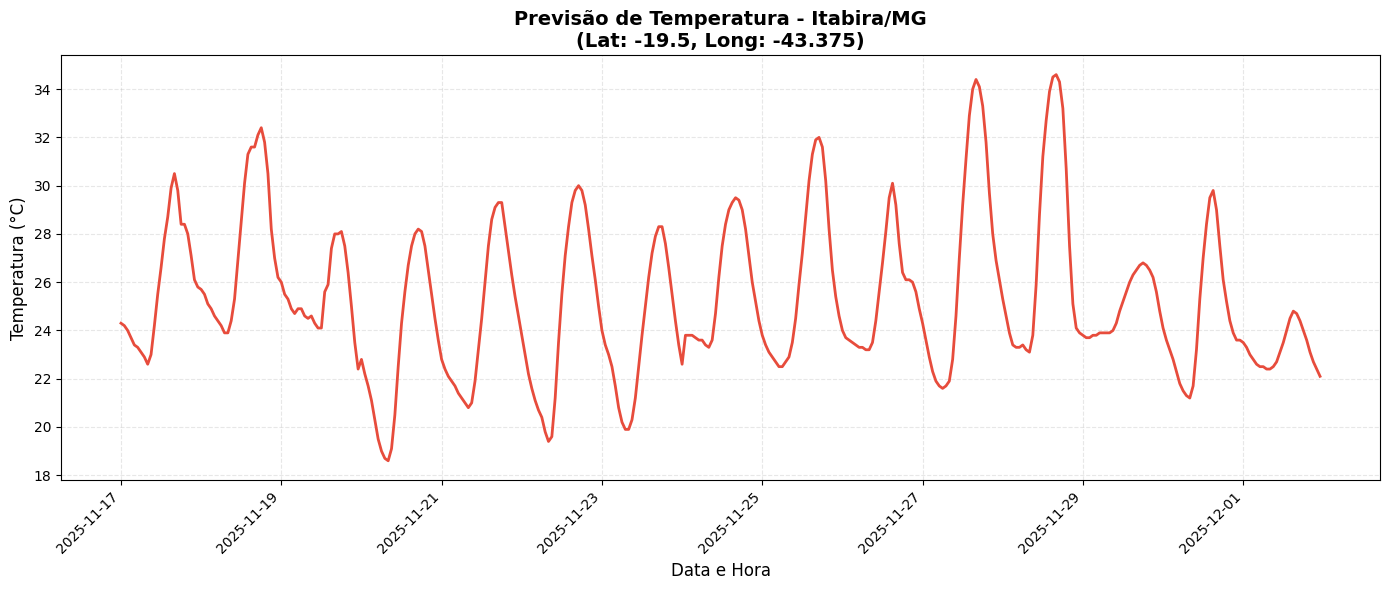

Temperatura mínima: 18.6°C
Temperatura máxima: 34.6°C
Temperatura média: 25.3°C


In [3]:
%pip install matplotlib 
import requests
import matplotlib.pyplot as plt
from datetime import datetime
from pydantic import BaseModel
from typing import List

# Modelos Pydantic da Q3
class HourlyUnits(BaseModel):
    time: str
    temperature_2m: str

class Hourly(BaseModel):
    time: List[str]
    temperature_2m: List[float]

class OpenMeteo(BaseModel):
    latitude: float
    longitude: float
    generationtime_ms: float
    utc_offset_seconds: int
    timezone: str
    timezone_abbreviation: str
    elevation: float
    hourly_units: HourlyUnits
    hourly: Hourly

# Coletar dados da API
url = 'https://api.open-meteo.com/v1/forecast'
lat, long = -19.656655787605846, -43.228922960534476
params = {'latitude': lat, 'longitude': long, 'elevation': 2,
          'hourly': 'temperature_2m', 'forecast_days': 15}

response = requests.get(url, params=params).json()
dados = OpenMeteo(**response)

# Converter timestamps para objetos datetime
timestamps = [datetime.fromisoformat(t) for t in dados.hourly.time]
temperatures = dados.hourly.temperature_2m

# Criar o gráfico
plt.figure(figsize=(14, 6))
plt.plot(timestamps, temperatures, linewidth=2, color='#e74c3c')
plt.xlabel('Data e Hora', fontsize=12)
plt.ylabel('Temperatura (°C)', fontsize=12)
plt.title(f'Previsão de Temperatura - Itabira/MG\n(Lat: {dados.latitude}, Long: {dados.longitude})', 
          fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3, linestyle='--')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Estatísticas
print(f"Temperatura mínima: {min(temperatures):.1f}°C")
print(f"Temperatura máxima: {max(temperatures):.1f}°C")
print(f"Temperatura média: {sum(temperatures)/len(temperatures):.1f}°C")